# EmotionGait

In [2]:
import pandas as pd


df=pd.read_csv("csv/EmotionGait.csv")  
df

,GaitID,Etichetta,F0_Fr0,F1_Fr0,F2_Fr0,F3_Fr0,F4_Fr0,F5_Fr0,F6_Fr0,F7_Fr0,...,F1_Fr29,F2_Fr29,F3_Fr29,F4_Fr29,F5_Fr29,F6_Fr29,F7_Fr29,F8_Fr29,F9_Fr29,F10_Fr29
0,VID_RGB_000,1,0.076209,0.123691,0.106284,0.065509,0.048905,0.085575,0.098547,0.045124,...,0.190942,0.167025,0.106397,0.074253,0.137354,0.169614,0.087737,0.303073,0.200608,0.162787
1,VID_RGB_001,0,0.049449,0.103354,0.088572,0.053572,0.032223,0.079796,0.078536,-0.005148,...,0.142089,0.121072,0.074289,0.047318,0.093234,0.098814,0.077719,0.211961,0.168408,0.065334
2,VID_RGB_002,1,0.073230,0.129069,0.120096,0.073161,0.055406,0.094836,0.102547,0.053113,...,0.183688,0.179663,0.100995,0.080146,0.120591,0.140096,0.053324,0.272668,0.217576,0.078943
3,VID_RGB_003,0,0.075998,0.132690,0.126365,0.074006,0.052288,0.095244,0.092018,0.033527,...,0.187526,0.180973,0.088068,0.070034,0.132988,0.125418,0.026944,0.250173,0.203489,0.097879
4,VID_RGB_004,1,0.071630,0.117929,0.108795,0.087195,0.050333,0.075005,0.077375,0.043959,...,0.172161,0.144109,0.142761,0.088011,0.123188,0.126025,0.024033,0.264229,0.183793,0.113625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,VID_RGB_056,3,0.081411,0.129233,0.142439,0.054821,0.092436,0.079409,0.085939,0.000717,...,0.195701,0.210202,0.110068,0.112237,0.144812,0.147520,0.025343,0.219829,0.284698,0.095764
57,VID_RGB_057,2,0.062319,0.120997,0.120658,0.059054,0.057287,0.082953,0.079466,-0.025509,...,0.168991,0.176450,0.088668,0.075964,0.124641,0.117566,0.018094,0.171588,0.234485,0.095696
58,VID_RGB_058,2,0.097754,0.142013,0.154042,0.065870,0.076018,0.099642,0.097455,0.021661,...,0.206750,0.214476,0.111021,0.102886,0.155063,0.148054,0.027059,0.221373,0.291369,0.119442
59,VID_RGB_059,2,0.075268,0.122941,0.130555,0.056927,0.067450,0.081013,0.083070,0.003704,...,0.183382,0.193149,0.091539,0.082919,0.137971,0.131967,0.009108,0.196950,0.257529,0.106394


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 332 entries, GaitID to F10_Fr29
dtypes: float64(330), int64(1), object(1)
memory usage: 158.3+ KB


## Esperimento 1 - Pipeline Senza Pre-Processing

Nel primo esperimento verrano valutate le prestazioni di diversi classificatori, in particolare SVM, DT, RF, XGB, Percpetron, LogisticRegressione e KNN senza andare ad applicare nessuna operazione di pre-processing sui dati. La valutazione di tali classificazione sara gestita tramite l'utilizzo di una cross validation a 5-fold

SVM - 5 Fold accuracy: 0.378 +/- 0.071
DT - 5 Fold accuracy: 0.328 +/- 0.092
RF - 5 Fold accuracy: 0.296 +/- 0.088
XGB - 5 Fold accuracy: 0.245 +/- 0.068
P - 5 Fold accuracy: 0.327 +/- 0.101
LR - 5 Fold accuracy: 0.379 +/- 0.091
KNN - 5 Fold accuracy: 0.295 +/- 0.038


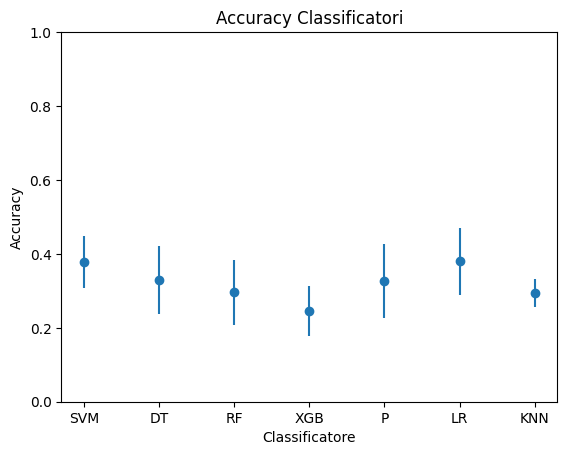

In [4]:
import pandas as pd
import numpy as np
import random as python_random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


np.random.seed(42)
python_random.seed(42)



df=pd.read_csv("csv/EmotionGait.csv")  
X_dataframe=df.drop(['GaitID','Etichetta'],axis=1)
y_dataframe=df['Etichetta']


classificatori={
    'Nome':['SVM','DT','RF','XGB','P','LR','KNN'],
    'Modello':[SVC(kernel="rbf",class_weight='balanced',random_state=42),
               DecisionTreeClassifier(class_weight='balanced',random_state=42),
               RandomForestClassifier(class_weight='balanced',random_state=42),
               XGBClassifier(random_state=42),
               Perceptron(class_weight='balanced',random_state=42),
               LogisticRegression(class_weight='balanced',random_state=42),
               KNeighborsClassifier()],
    'Accuracy Mean':[],
    'Accuracy Std':[]
}



for name_clf,clf in zip(classificatori['Nome'],classificatori['Modello']):
    
    if name_clf=="XGB":
        classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_dataframe)
        scores = cross_val_score(estimator=clf, 
                                 X=X_dataframe, 
                                 y=y_dataframe, 
                                 cv=3,
                                 n_jobs=1,
                                 fit_params={'sample_weight':classes_weights})
        
    else:
        scores = cross_val_score(estimator=clf, 
                                 X=X_dataframe, 
                                 y=y_dataframe, 
                                 cv=5,
                                 n_jobs=1)
        
    classificatori['Accuracy Mean'].append(np.mean(scores))
    classificatori['Accuracy Std'].append(np.std(scores))
    print('{} - 5 Fold accuracy: {:.3f} +/- {:.3f}'.format(name_clf,np.mean(scores), np.std(scores)))


    
    

plt.title("Accuracy Classificatori")
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlabel('Classificatore')
plt.errorbar(classificatori['Nome'], classificatori['Accuracy Mean'], yerr=classificatori['Accuracy Std'], fmt="o")
plt.show()


## Esperimento 2 - Pipeline con PCA

Nel secondo esperimento verrano valutate le prestazioni di diversi classificatori, in particolare SVM, DT, RF, XGB, Percpetron, LogisticRegressione e KNN andando ad eseguire la PCA sui dati in modo tale da ridurre in numero di features. La valutazione di tali classificazione sara gestita tramite l'utilizzo di una cross validation a 5-fold

Varianza Cumulativa: 0.9522366792747979
Numero Componenti: 17


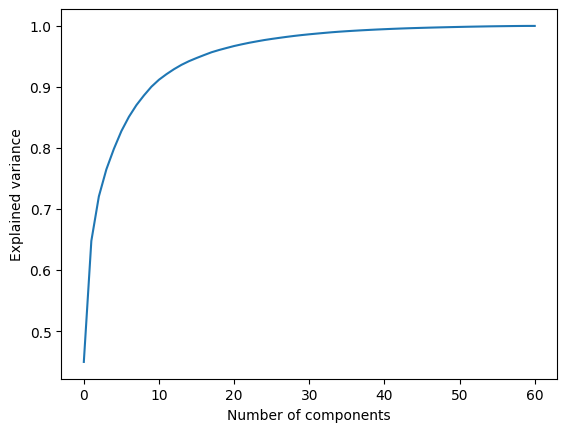

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df=pd.read_csv("csv/EmotionGait.csv")  
X_dataframe=df.drop(['GaitID','Etichetta'],axis=1)
y_dataframe=df['Etichetta']


pca=PCA()
pca.fit(X_dataframe)


plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

somma=0
n_component=0
for value in pca.explained_variance_ratio_:
    n_component=n_component+1
    somma=somma+value
    if somma >=0.95:
        break
print("Varianza Cumulativa: {}".format(somma))
print("Numero Componenti: {}".format(n_component))

Grazie all'utilizzo della PCA riusciamo ad ottenere una riduzione delle features da circa 300 a 17 mantenendo, il 95% di varianza cumulativa

SVM - 5 Fold accuracy: 0.329 +/- 0.109
DT - 5 Fold accuracy: 0.297 +/- 0.116
RF - 5 Fold accuracy: 0.394 +/- 0.033
XGB - 5 Fold accuracy: 0.441 +/- 0.071
P - 5 Fold accuracy: 0.279 +/- 0.087
LR - 5 Fold accuracy: 0.413 +/- 0.098
KNN - 5 Fold accuracy: 0.277 +/- 0.075


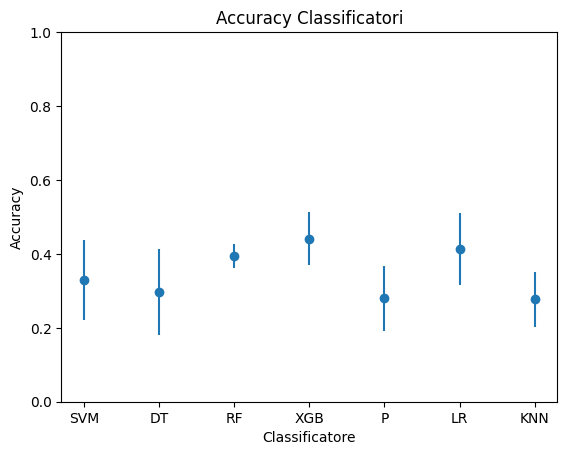

In [18]:
import pandas as pd
import numpy as np
import random as python_random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier

np.random.seed(42)
python_random.seed(42)

df=pd.read_csv("csv/EmotionGait.csv")  
X_dataframe=df.drop(['GaitID','Etichetta'],axis=1)
y_dataframe=df['Etichetta']


pca=PCA(n_components=17)
X_dataframe=pca.fit_transform(X_dataframe)
X_dataframe=pd.DataFrame(data=X_dataframe)



classificatori={
    'Nome':['SVM','DT','RF','XGB','P','LR','KNN'],
    'Modello':[SVC(kernel="rbf",class_weight='balanced',random_state=42),
               DecisionTreeClassifier(class_weight='balanced',random_state=42),
               RandomForestClassifier(class_weight='balanced',random_state=42),
               XGBClassifier(random_state=42),
               Perceptron(class_weight='balanced',random_state=42),
               LogisticRegression(class_weight='balanced',random_state=42),
               KNeighborsClassifier()],
    'Accuracy Mean':[],
    'Accuracy Std':[]
}


for name_clf,clf in zip(classificatori['Nome'],classificatori['Modello']):
    
    if name_clf=="XGB":
        classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_dataframe)
        scores = cross_val_score(estimator=clf, 
                                 X=X_dataframe, 
                                 y=y_dataframe, 
                                 cv=3,
                                 n_jobs=1,
                                 fit_params={'sample_weight':classes_weights})
    else:
        scores = cross_val_score(estimator=clf, 
                                 X=X_dataframe, 
                                 y=y_dataframe, 
                                 cv=5,
                                 n_jobs=1)
    
    classificatori['Accuracy Mean'].append(np.mean(scores))
    classificatori['Accuracy Std'].append(np.std(scores))
    print('{} - 5 Fold accuracy: {:.3f} +/- {:.3f}'.format(name_clf,np.mean(scores), np.std(scores)))
    

    
plt.title("Accuracy Classificatori")
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlabel('Classificatore')
plt.errorbar(classificatori['Nome'], classificatori['Accuracy Mean'], yerr=classificatori['Accuracy Std'], fmt="o")
plt.show()

## Esperimento 3 - Data Agumentation Con SMOTE

Nel terzo esperimento verrano valutate le prestazioni di diversi classificatori, in particolare SVM, DT, RF, XGB, Percpetron, LogisticRegressione e KNN effettuando un agumentation dei dati tramite l'utilizzo di SMOTE. La valutazione di tali classificazione sarà gestita tramite l'utilizzo di una cross validation a 5-fold.
Tramite l'utilizzo si SMOTE per ogni classe andremo ad eseguire un agumentation di 50 campioni

SVM - 5 Fold accuracy: 0.36282 +/- 0.14855
DT - 5 Fold accuracy: 0.36026 +/- 0.06299
RF - 5 Fold accuracy: 0.32821 +/- 0.09186
XGB - 5 Fold accuracy: 0.31154 +/- 0.11026
P - 5 Fold accuracy: 0.28077 +/- 0.07120
LR - 5 Fold accuracy: 0.41282 +/- 0.12341
KNN - 5 Fold accuracy: 0.27949 +/- 0.04452


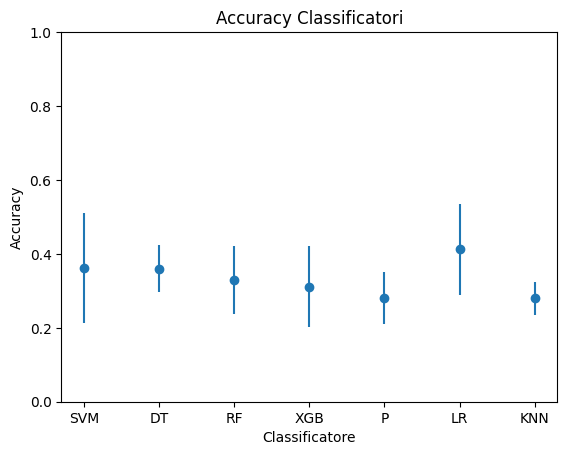

In [23]:
import warnings
import pandas as pd
import numpy as np
import random as python_random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier


warnings.filterwarnings("ignore")
np.random.seed(42)
python_random.seed(42)

df=pd.read_csv("csv/EmotionGait.csv")  
X_dataframe=df.drop(['GaitID','Etichetta'],axis=1)
y_dataframe=df['Etichetta']


#Eseguo una cross-validation stratificata
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classificatori={
    'Nome':['SVM','DT','RF','XGB','P','LR','KNN'],
    'Modello':[SVC(kernel="rbf",class_weight='balanced',random_state=42),
               DecisionTreeClassifier(class_weight='balanced',random_state=42),
               RandomForestClassifier(class_weight='balanced',random_state=42),
               XGBClassifier(random_state=42),
               Perceptron(class_weight='balanced',random_state=42),
               LogisticRegression(class_weight='balanced',random_state=42),
               KNeighborsClassifier()],
    'Accuracy Mean':[],
    'Accuracy Std':[]
}




    
for name_clf,clf in zip(classificatori['Nome'],classificatori['Modello']):

    scores=[]
    for train_index, validation_index in skf.split(X_dataframe, y_dataframe):
        X_train, X_val = X_dataframe.iloc[train_index],X_dataframe.iloc[validation_index]
        y_train, y_val = y_dataframe.iloc[train_index], y_dataframe.iloc[validation_index]
        smote=SMOTE(sampling_strategy={0:50,
                                      1:50,
                                      2:50,
                                      3:50})
        X_train,y_train=smote.fit_resample(X_train,y_train)
        
    

        if name_clf=="XGB":
            classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)
            clf.fit(X_train,y_train,sample_weight=classes_weights)
            y_pred=clf.predict(X_val)
            scores.append(classification_report(y_val, y_pred,output_dict=True,zero_division=0)['accuracy'])
        else:
            clf.fit(X_train,y_train)
            y_pred=clf.predict(X_val)
            scores.append(classification_report(y_val, y_pred,output_dict=True,zero_division=0)['accuracy'])

    classificatori['Accuracy Mean'].append(np.mean(scores))
    classificatori['Accuracy Std'].append(np.std(scores))  
    print('{} - 5 Fold accuracy: {:.5f} +/- {:.5f}'.format(name_clf,np.mean(scores), np.std(scores)))
    scores.clear()
    
plt.title("Accuracy Classificatori")
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlabel('Classificatore')
plt.errorbar(classificatori['Nome'], classificatori['Accuracy Mean'], yerr=classificatori['Accuracy Std'], fmt="o")
plt.show()


## Esperimento 4 - Pipeline con PCA e Data Agumentation Con SMOTE

Nel quarto esperimento verrano valutate le prestazioni di diversi classificatori, in particolare SVM, DT, RF, XGB, Percpetron, LogisticRegressione e KNN andando a ridurre le features con la PCE e effettuando un agumentation dei dati tramite l'utilizzo di SMOTE. La valutazione di tali classificazione sarà gestita tramite l'utilizzo di una cross validation a 5-fold.
Tramite l'utilizzo si SMOTE per ogni classe andremo ad eseguire un agumentation di 50 campioni

SVM - 5 Fold accuracy: 0.296 +/- 0.070
DT - 5 Fold accuracy: 0.410 +/- 0.140
RF - 5 Fold accuracy: 0.478 +/- 0.139
XGB - 5 Fold accuracy: 0.458 +/- 0.052
P - 5 Fold accuracy: 0.362 +/- 0.115
LR - 5 Fold accuracy: 0.413 +/- 0.123
KNN - 5 Fold accuracy: 0.313 +/- 0.067


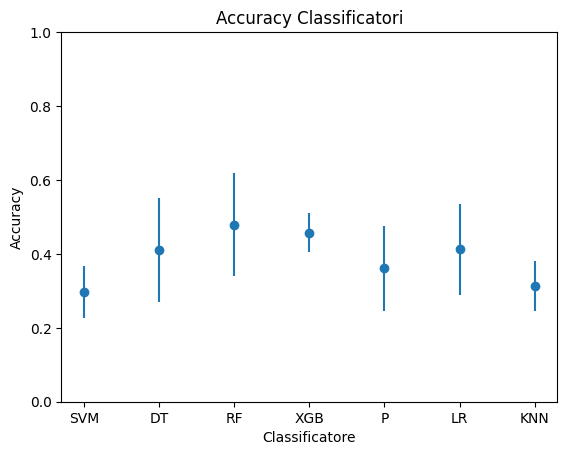

In [20]:
import warnings
import pandas as pd
import numpy as np
import random as python_random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
np.random.seed(42)
python_random.seed(42)


df=pd.read_csv("csv/EmotionGait.csv")  
X_dataframe=df.drop(['GaitID','Etichetta'],axis=1)
y_dataframe=df['Etichetta']

pca=PCA(n_components=17)
X_dataframe=pca.fit_transform(X_dataframe)
X_dataframe=pd.DataFrame(data=X_dataframe)


#Eseguo una cross-validation stratificata
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classificatori={
    'Nome':['SVM','DT','RF','XGB','P','LR','KNN'],
    'Modello':[SVC(kernel="rbf",class_weight='balanced',random_state=42),
               DecisionTreeClassifier(class_weight='balanced',random_state=42),
               RandomForestClassifier(class_weight='balanced',random_state=42),
               XGBClassifier(random_state=42),
               Perceptron(class_weight='balanced',random_state=42),
               LogisticRegression(class_weight='balanced',random_state=42),
               KNeighborsClassifier()],
    'Accuracy Mean':[],
    'Accuracy Std':[]
}


smote=SMOTE(sampling_strategy={0:50,
                              1:50,
                              2:50,
                              3:50})
    
for name_clf,clf in zip(classificatori['Nome'],classificatori['Modello']):

    scores=[]
    for train_index, validation_index in skf.split(X_dataframe, y_dataframe):
        X_train, X_val = X_dataframe.iloc[train_index],X_dataframe.iloc[validation_index]
        y_train, y_val = y_dataframe.iloc[train_index], y_dataframe.iloc[validation_index]
    
        X_train,y_train=smote.fit_resample(X_train,y_train)
        

        if name_clf=="XGB":
            classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)
            clf.fit(X_train,y_train,sample_weight=classes_weights)
            y_pred=clf.predict(X_val)
            scores.append(classification_report(y_val, y_pred,output_dict=True,zero_division=0)['accuracy'])
        else:
            clf.fit(X_train,y_train)
            y_pred=clf.predict(X_val)
            scores.append(classification_report(y_val, y_pred,output_dict=True,zero_division=0)['accuracy'])

    classificatori['Accuracy Mean'].append(np.mean(scores))
    classificatori['Accuracy Std'].append(np.std(scores))        
    print('{} - 5 Fold accuracy: {:.3f} +/- {:.3f}'.format(name_clf,np.mean(scores), np.std(scores)))
    scores.clear()
    
plt.title("Accuracy Classificatori")
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlabel('Classificatore')
plt.errorbar(classificatori['Nome'], classificatori['Accuracy Mean'], yerr=classificatori['Accuracy Std'], fmt="o")
plt.show()


## Esperimento 5 - Data Agumentation utilizzando tutti i gait presenti nel video


SVM - 5 Fold accuracy: 0.396 +/- 0.165
DT - 5 Fold accuracy: 0.376 +/- 0.167
RF - 5 Fold accuracy: 0.313 +/- 0.067
XGB - 5 Fold accuracy: 0.362 +/- 0.115
P - 5 Fold accuracy: 0.346 +/- 0.101
LR - 5 Fold accuracy: 0.396 +/- 0.138
KNN - 5 Fold accuracy: 0.245 +/- 0.069


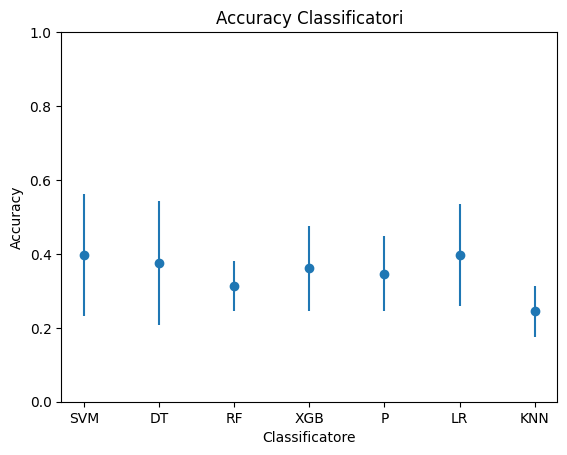

In [86]:
import warnings
import pandas as pd
import numpy as np
import random as python_random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
np.random.seed(42)
python_random.seed(42)


df=pd.read_csv("csv/EmotionGait_Agumentation.csv")  


gait_dataframe=df[['GaitID','Etichetta']]
unique_gait_dataframe=gait_dataframe[gait_dataframe['GaitID'].str.endswith('0')]
unique_gait_dataframe

X_unique_gait_dataframe=unique_gait_dataframe['GaitID']
y_unique_gait_dataframe=unique_gait_dataframe['Etichetta']



classificatori={
    'Nome':['SVM','DT','RF','XGB','P','LR','KNN'],
    'Modello':[SVC(kernel="rbf",class_weight='balanced',random_state=42),
               DecisionTreeClassifier(class_weight='balanced',random_state=42),
               RandomForestClassifier(class_weight='balanced',random_state=42),
               XGBClassifier(random_state=42),
               Perceptron(class_weight='balanced',random_state=42),
               LogisticRegression(class_weight='balanced',random_state=42),
               KNeighborsClassifier()],
    'Accuracy Mean':[],
    'Accuracy Std':[]
}

skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name_clf,clf in zip(classificatori['Nome'],classificatori['Modello']):
    scores=[]
    for train_index, validation_index in skf.split(X_unique_gait_dataframe, y_unique_gait_dataframe):
            train_gait, val_gait = X_unique_gait_dataframe.iloc[train_index],X_unique_gait_dataframe.iloc[validation_index]
            
    
            train_gait_id=[]
            for id in train_gait:
                unique_id=id[0:11]
                if len(train_gait_id)==0 or not unique_id in train_gait_id:
                    train_gait_id.append(unique_id)
            train_set= df[df['GaitID'].str.contains('|'.join(train_gait_id))].reset_index(drop=True)

        
            val_gait_id=[]
            for id in val_gait:
                unique_id=id[0:11]
                if len(val_gait_id)==0 or not unique_id in val_gait_id:
                    val_gait_id.append(unique_id)
            val_set= df[df['GaitID'].isin(val_gait)].reset_index(drop=True)
        
            
            
            if set(train_gait_id).intersection(val_gait_id):
                print("Le liste hanno elementi in comune.")
                break
            

            X_train=train_set.drop(['GaitID','Etichetta'],axis=1)
            y_train=train_set['Etichetta']
            X_val=val_set.drop(['GaitID','Etichetta'],axis=1)
            y_val=val_set['Etichetta']
            
            
            if name_clf=="XGB":
                classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)
                clf.fit(X_train,y_train,sample_weight=classes_weights)
                y_pred=clf.predict(X_val)
                scores.append(classification_report(y_val, y_pred,output_dict=True,zero_division=0)['accuracy'])
            else:
                clf.fit(X_train,y_train)
                y_pred=clf.predict(X_val)
                scores.append(classification_report(y_val, y_pred,output_dict=True,zero_division=0)['accuracy'])

    classificatori['Accuracy Mean'].append(np.mean(scores))
    classificatori['Accuracy Std'].append(np.std(scores))        
    print('{} - 5 Fold accuracy: {:.3f} +/- {:.3f}'.format(name_clf,np.mean(scores), np.std(scores)))
    scores.clear()

        
plt.title("Accuracy Classificatori")
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlabel('Classificatore')
plt.errorbar(classificatori['Nome'], classificatori['Accuracy Mean'], yerr=classificatori['Accuracy Std'], fmt="o")
plt.show()      

## Esperimento 6 - Pipeline con PCA e Data Agumentation utilizzando tutti i gait presenti nel video


SVM - 5 Fold accuracy: 0.329 +/- 0.095
DT - 5 Fold accuracy: 0.344 +/- 0.094
RF - 5 Fold accuracy: 0.346 +/- 0.087
XGB - 5 Fold accuracy: 0.377 +/- 0.037
P - 5 Fold accuracy: 0.427 +/- 0.065
LR - 5 Fold accuracy: 0.429 +/- 0.157
KNN - 5 Fold accuracy: 0.278 +/- 0.064


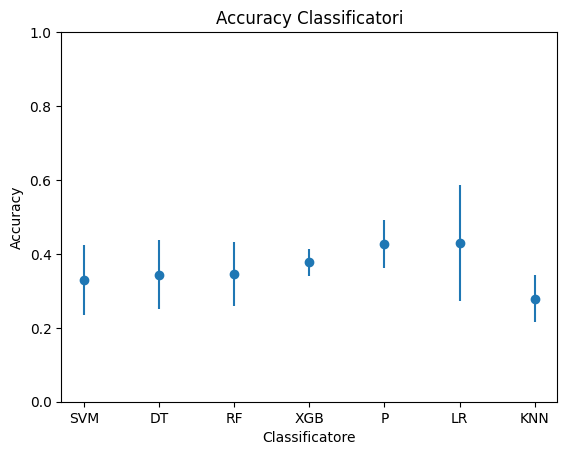

In [87]:
import warnings
import pandas as pd
import numpy as np
import random as python_random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
np.random.seed(42)
python_random.seed(42)


df=pd.read_csv("csv/EmotionGait_Agumentation.csv")  
X_dataframe=df.drop(['GaitID','Etichetta'],axis=1).reset_index(drop=True)
y_dataframe=df[['GaitID','Etichetta']].reset_index(drop=True)

pca=PCA(n_components=17)
X_dataframe=pca.fit_transform(X_dataframe)
X_dataframe=pd.DataFrame(data=X_dataframe)


df=pd.concat([X_dataframe,y_dataframe],axis=1)


gait_dataframe=df[['GaitID','Etichetta']]
unique_gait_dataframe=gait_dataframe[gait_dataframe['GaitID'].str.endswith('0')]
unique_gait_dataframe

X_unique_gait_dataframe=unique_gait_dataframe['GaitID']
y_unique_gait_dataframe=unique_gait_dataframe['Etichetta']



classificatori={
    'Nome':['SVM','DT','RF','XGB','P','LR','KNN'],
    'Modello':[SVC(kernel="rbf",class_weight='balanced',random_state=42),
               DecisionTreeClassifier(class_weight='balanced',random_state=42),
               RandomForestClassifier(class_weight='balanced',random_state=42),
               XGBClassifier(random_state=42),
               Perceptron(class_weight='balanced',random_state=42),
               LogisticRegression(class_weight='balanced',random_state=42),
               KNeighborsClassifier()],
    'Accuracy Mean':[],
    'Accuracy Std':[]
}

skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name_clf,clf in zip(classificatori['Nome'],classificatori['Modello']):
    scores=[]
    for train_index, validation_index in skf.split(X_unique_gait_dataframe, y_unique_gait_dataframe):
            train_gait, val_gait = X_unique_gait_dataframe.iloc[train_index],X_unique_gait_dataframe.iloc[validation_index]
            
    
            train_gait_id=[]
            for id in train_gait:
                unique_id=id[0:11]
                if len(train_gait_id)==0 or not unique_id in train_gait_id:
                    train_gait_id.append(unique_id)
            train_set= df[df['GaitID'].str.contains('|'.join(train_gait_id))].reset_index(drop=True)

        
            val_gait_id=[]
            for id in val_gait:
                unique_id=id[0:11]
                if len(val_gait_id)==0 or not unique_id in val_gait_id:
                    val_gait_id.append(unique_id)
            val_set= df[df['GaitID'].isin(val_gait)].reset_index(drop=True)
        
            
            
            if set(train_gait_id).intersection(val_gait_id):
                print("Le liste hanno elementi in comune.")
                break
            

            X_train=train_set.drop(['GaitID','Etichetta'],axis=1)
            y_train=train_set['Etichetta']
            X_val=val_set.drop(['GaitID','Etichetta'],axis=1)
            y_val=val_set['Etichetta']
            
            
            if name_clf=="XGB":
                classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)
                clf.fit(X_train,y_train,sample_weight=classes_weights)
                y_pred=clf.predict(X_val)
                scores.append(classification_report(y_val, y_pred,output_dict=True,zero_division=0)['accuracy'])
            else:
                clf.fit(X_train,y_train)
                y_pred=clf.predict(X_val)
                scores.append(classification_report(y_val, y_pred,output_dict=True,zero_division=0)['accuracy'])

    classificatori['Accuracy Mean'].append(np.mean(scores))
    classificatori['Accuracy Std'].append(np.std(scores))        
    print('{} - 5 Fold accuracy: {:.3f} +/- {:.3f}'.format(name_clf,np.mean(scores), np.std(scores)))
    scores.clear()

        
plt.title("Accuracy Classificatori")
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlabel('Classificatore')
plt.errorbar(classificatori['Nome'], classificatori['Accuracy Mean'], yerr=classificatori['Accuracy Std'], fmt="o")
plt.show()      

# Risultati Machine Learning

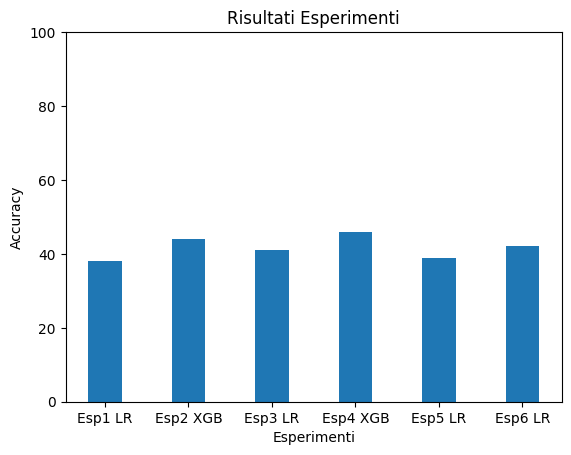

In [5]:
import matplotlib.pyplot as plt

data={'exp':['Esp1 LR','Esp2 XGB','Esp3 LR','Esp4 XGB','Esp5 LR','Esp6 LR'],
     'perf':[38,44,41,46,39,42]}


plt.bar(data['exp'], data['perf'],width = 0.4)
 
plt.xlabel("Esperimenti")
plt.ylabel("Accuracy")
plt.ylim([0, 100])
plt.title("Risultati Esperimenti")
plt.show()

## Esperimento 7 - DeepLearning

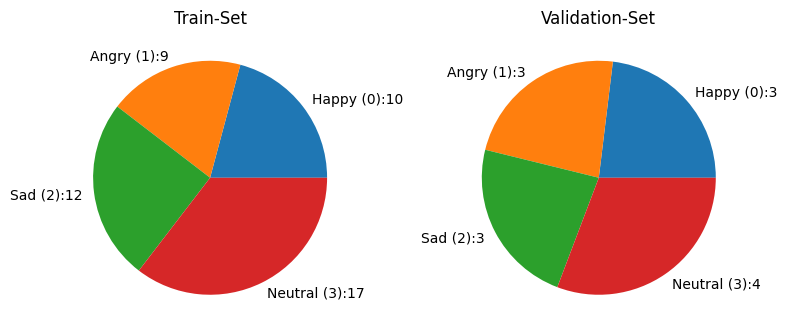

In [13]:
import copy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE



df=pd.read_csv("csv/EmotionGait.csv")  



X_dataframe=df.drop(['GaitID','Etichetta'],axis=1)
y_dataframe=df['Etichetta']

pca=PCA(n_components=17)
X_dataframe=pca.fit_transform(X_dataframe)
X_dataframe=pd.DataFrame(data=X_dataframe)


X_train, X_val, y_train, y_val = train_test_split(X_dataframe, y_dataframe,
                                                    stratify=y_dataframe, 
                                                    test_size=0.20,random_state=42)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

dic_occ=y_train.value_counts().to_dict()
axes[0].pie([dic_occ[0],dic_occ[1],dic_occ[2],dic_occ[3]],labels=["Happy (0):{}".format(dic_occ[0]),
                                                              "Angry (1):{}".format(dic_occ[1]),
                                                              "Sad (2):{}".format(dic_occ[2]),
                                                              "Neutral (3):{}".format(dic_occ[3])])
axes[0].set_title("Train-Set")


dic_occ=y_val.value_counts().to_dict()
axes[1].pie([dic_occ[0],dic_occ[1],dic_occ[2],dic_occ[3]],labels=["Happy (0):{}".format(dic_occ[0]),
                                                                      "Angry (1):{}".format(dic_occ[1]),
                                                                      "Sad (2):{}".format(dic_occ[2]),
                                                                      "Neutral (3):{}".format(dic_occ[3])])
axes[1].set_title("Validation-Set")

fig.tight_layout()
plt.show()


X_train=X_train.to_numpy()
X_val=X_val.to_numpy()
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()

In [15]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import initializers
import keras
from sklearn.utils import class_weight
import numpy as np
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from keras.utils import to_categorical
import random as python_random
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras import regularizers

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)



num_rows, num_cols = X_train.shape

y_train_one_hot = to_categorical(y_train, num_classes=4)
y_val_one_hot = to_categorical(y_val, num_classes=4)



model=keras.models.Sequential()
model.add(Dense(32,activation='relu',input_dim=num_cols))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))



optimizer=Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
loss='categorical_crossentropy',
metrics=['accuracy']
)



callback_a=ModelCheckpoint(filepath='my_best_model.hdf5',monitor='val_loss',save_best_only=True)
history=model.fit(x=X_train,
          y=y_train_one_hot,
          validation_data=(X_val,y_val_one_hot),
          epochs=4000,
          batch_size=10,
          callbacks=[callback_a])
        

Epoch 1/4000
5/5 [==============================] - 0s 54ms/step - loss: 1.4499 - accuracy: 0.2083 - val_loss: 1.3525 - val_accuracy: 0.3077
Epoch 2/4000
5/5 [==============================] - 0s 18ms/step - loss: 1.3761 - accuracy: 0.3333 - val_loss: 1.3522 - val_accuracy: 0.3077
Epoch 3/4000
5/5 [==============================] - 0s 19ms/step - loss: 1.4169 - accuracy: 0.1458 - val_loss: 1.3520 - val_accuracy: 0.3077
Epoch 4/4000


/Users/angeloafeltra/anaconda3/envs/EmotionWalk/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 19ms/step - loss: 1.3737 - accuracy: 0.2917 - val_loss: 1.3520 - val_accuracy: 0.3077
Epoch 5/4000
5/5 [==============================] - 0s 18ms/step - loss: 1.4530 - accuracy: 0.1250 - val_loss: 1.3519 - val_accuracy: 0.3077
Epoch 6/4000
5/5 [==============================] - 0s 18ms/step - loss: 1.3875 - accuracy: 0.3542 - val_loss: 1.3518 - val_accuracy: 0.3077
Epoch 7/4000
5/5 [==============================] - 0s 18ms/step - loss: 1.3905 - accuracy: 0.2500 - val_loss: 1.3518 - val_accuracy: 0.3077
Epoch 8/4000
5/5 [==============================] - 0s 18ms/step - loss: 1.3998 - accuracy: 0.2292 - val_loss: 1.3518 - val_accuracy: 0.3077
Epoch 9/4000
5/5 [==============================] - 0s 18ms/step - loss: 1.4120 - accuracy: 0.3750 - val_loss: 1.3516 - val_accuracy: 0.3077
Epoch 10/4000
5/5 [==============================] - 0s 17ms/step - loss: 1.3853 - accuracy: 0.2917 - val_loss: 1.3515 - val_accuracy: 0.3077
Epoch 11/4000
5/5 [======

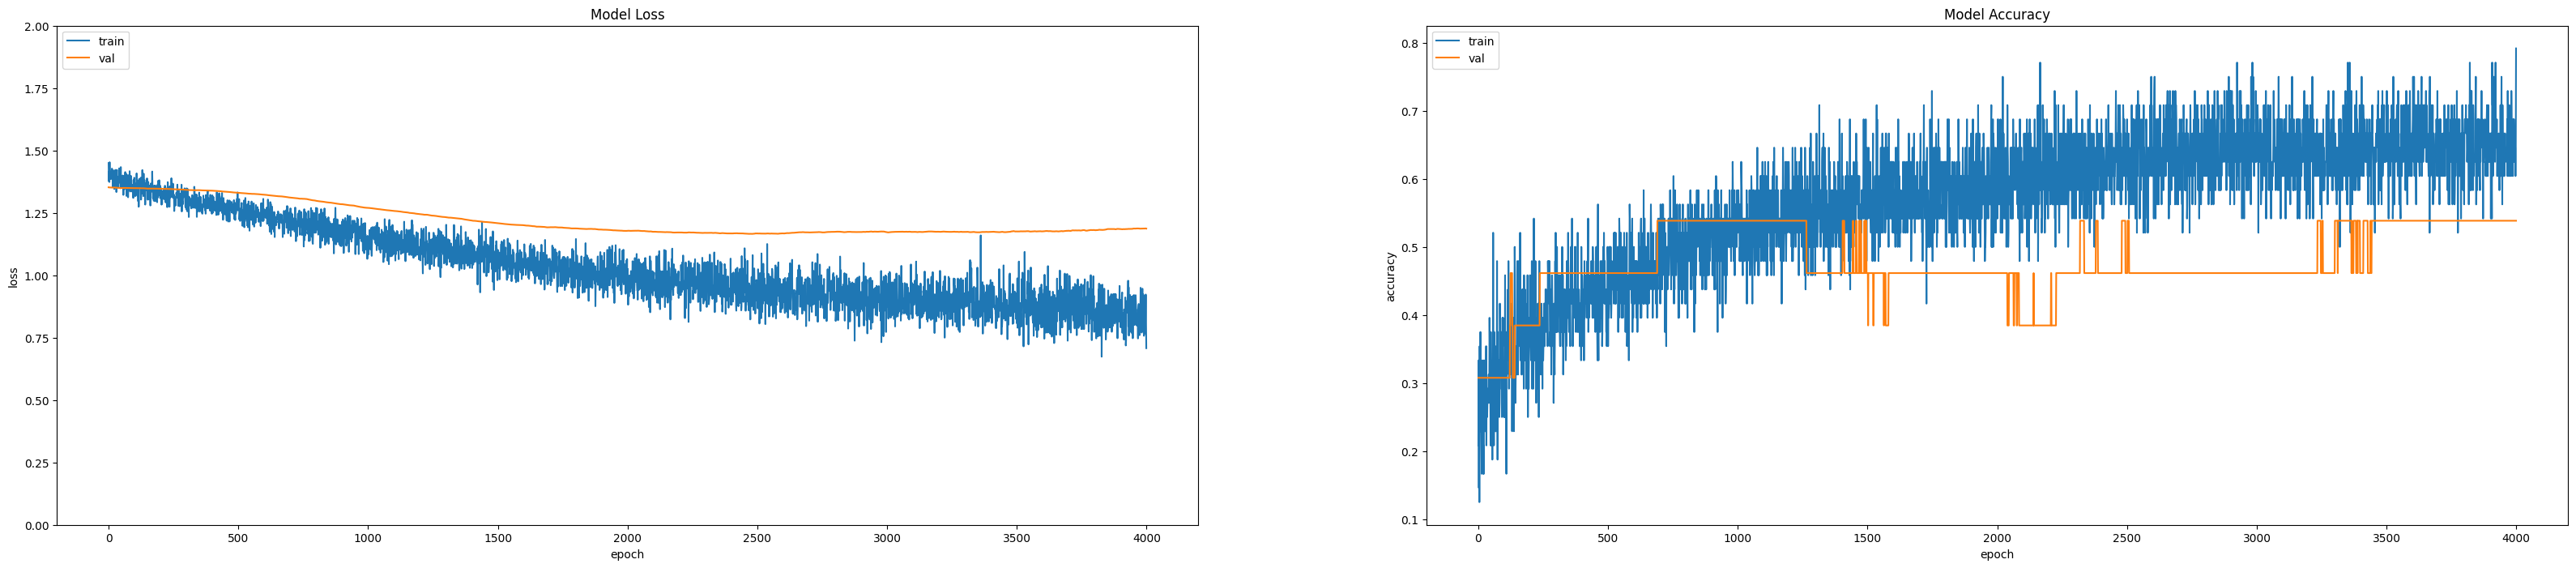

In [16]:
import matplotlib.pyplot as plt



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 8))
axes[0].set_title("Model Loss")
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylim(0, 2)
axes[0].legend(['train', 'val'], loc='upper left')

axes[1].set_title("Model Accuracy")
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'val'], loc='upper left')

plt.show()

In [17]:
model.load_weights('my_best_model.hdf5')


y_predict=model.predict(X_train)

etichette_classe = [0, 1, 2, 3]

indici_predetti = np.argmax(y_predict, axis=1)
mappa_etichette = {etichetta: indice for indice, etichetta in enumerate(etichette_classe)}
predizioni_interi = [mappa_etichette[etichette_classe[indice]] for indice in indici_predetti]

print(classification_report(y_train, predizioni_interi,zero_division=0))

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.45      0.56      0.50         9
           2       0.80      0.33      0.47        12
           3       0.44      0.82      0.57        17

    accuracy                           0.48        48
   macro avg       0.42      0.43      0.39        48
weighted avg       0.44      0.48      0.41        48



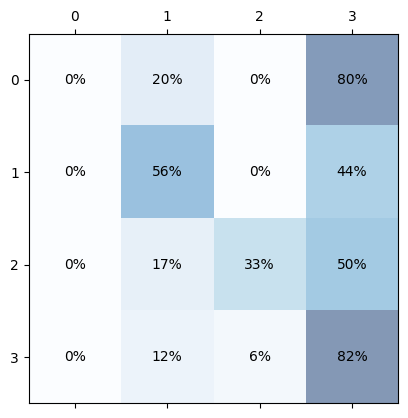

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm=confusion_matrix(y_train,predizioni_interi)
cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

fig, ax = plt.subplots()
ax.matshow(cm,cmap=plt.cm.Blues, alpha=0.5)

for i in range(4):
    for j in range(4):
        c = cm[j, i].round(2)
        ax.text(i, j, "{:.0f}%".format(c*100), va='center', ha='center')

plt.show()

In [19]:
y_predict=model.predict(X_val)

etichette_classe = [0, 1, 2, 3]

indici_predetti = np.argmax(y_predict, axis=1)
mappa_etichette = {etichetta: indice for indice, etichetta in enumerate(etichette_classe)}
predizioni_interi = [mappa_etichette[etichette_classe[indice]] for indice in indici_predetti]

print(classification_report(y_val, predizioni_interi,zero_division=0))

1/1 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.67      0.67         3
           2       0.50      0.67      0.57         3
           3       0.50      0.75      0.60         4

    accuracy                           0.54        13
   macro avg       0.42      0.52      0.46        13
weighted avg       0.42      0.54      0.47        13



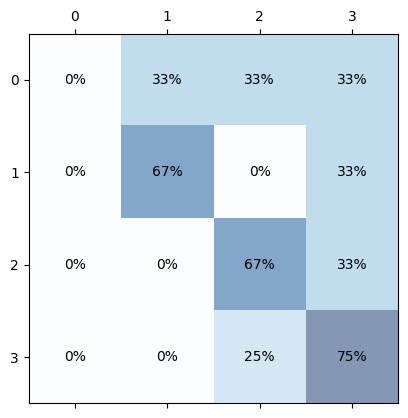

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm=confusion_matrix(y_val,predizioni_interi)
cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

fig, ax = plt.subplots()
ax.matshow(cm,cmap=plt.cm.Blues, alpha=0.5)

for i in range(4):
    for j in range(4):
        c = cm[j, i].round(2)
        ax.text(i, j, "{:.0f}%".format(c*100), va='center', ha='center')

plt.show()

# Cross Validation Deep Learning

In [13]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras import initializers
import keras
from sklearn.utils import class_weight
import numpy as np
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from keras.utils import to_categorical
import random as python_random
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras import regularizers

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)
warnings.filterwarnings("ignore")

df=pd.read_csv("csv/EmotionGait.csv")  
X_dataframe=df.drop(['GaitID','Etichetta'],axis=1)
y_dataframe=df['Etichetta']


pca=PCA(n_components=17)
X_dataframe=pca.fit_transform(X_dataframe)
X_dataframe=pd.DataFrame(data=X_dataframe)


#Eseguo una cross-validation stratificata
skf= StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores=[]
for train_index, validation_index in skf.split(X_dataframe, y_dataframe):
    X_train, X_val = X_dataframe.iloc[train_index],X_dataframe.iloc[validation_index]
    y_train, y_val = y_dataframe.iloc[train_index], y_dataframe.iloc[validation_index]
    

    num_rows, num_cols = X_train.shape

    y_train_one_hot = to_categorical(y_train, num_classes=4)
    y_val_one_hot = to_categorical(y_val, num_classes=4)

    model=keras.models.Sequential()
    model.add(Dense(32,activation='relu',input_dim=num_cols))
    model.add(Dropout(0.5))
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation='softmax'))


    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='categorical_crossentropy', 
                  metrics=['accuracy']
                )
    callback_a=ModelCheckpoint(filepath='my_best_model.hdf5',monitor='val_accuracy',save_best_only=True)
    #callback_b=EarlyStopping(monitor='val_accuracy',mode='max',patience=20,restore_best_weights=True,verbose=True)
    history=model.fit(x=X_train,
              y=y_train_one_hot,
              validation_data=(X_val,y_val_one_hot),
              epochs=4000,
              batch_size=10,
              callbacks=[callback_a],verbose=0)
    
    model.load_weights('my_best_model.hdf5')
    y_predict=model.predict(X_val)

    etichette_classe = [0, 1, 2, 3]

    indici_predetti = np.argmax(y_predict, axis=1)
    mappa_etichette = {etichetta: indice for indice, etichetta in enumerate(etichette_classe)}
    predizioni_interi = [mappa_etichette[etichette_classe[indice]] for indice in indici_predetti]
    
    
    print(classification_report(y_val, predizioni_interi,output_dict=True,zero_division=0)['accuracy'])
    scores.append(classification_report(y_val, predizioni_interi,output_dict=True,zero_division=0)['accuracy'])
    

print('5 Fold accuracy: {:.5f} +/- {:.5f}'.format(np.mean(scores), np.std(scores)))
scores.clear()




1/1 [==============================] - 0s 34ms/step


0.47619047619047616
1/1 [==============================] - 0s 34ms/step


0.45
1/1 [==============================] - 0s 30ms/step
0.45
5 Fold accuracy: 0.45873 +/- 0.01235


# Model Validation

In [21]:
import copy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




df=pd.read_csv("csv/EmotionGait_Test.csv")  



X_dataframe=df.drop(['GaitID','Etichetta'],axis=1)
y_dataframe=df['Etichetta']

X_dataframe=pca.transform(X_dataframe)
X_dataframe=pd.DataFrame(data=X_dataframe)

model.load_weights('my_best_model.hdf5')


y_predict=model.predict(X_dataframe)

etichette_classe = [0, 1, 2, 3]

indici_predetti = np.argmax(y_predict, axis=1)
mappa_etichette = {etichetta: indice for indice, etichetta in enumerate(etichette_classe)}
predizioni_interi = [mappa_etichette[etichette_classe[indice]] for indice in indici_predetti]

print(classification_report(y_dataframe, predizioni_interi,zero_division=0))

1/1 [==============================] - 0s 33ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.36      1.00      0.53         5

    accuracy                           0.33        15
   macro avg       0.09      0.25      0.13        15
weighted avg       0.12      0.33      0.18        15



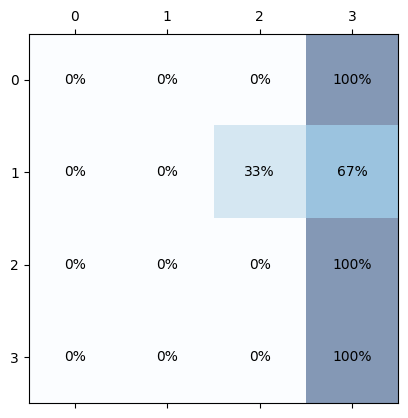

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm=confusion_matrix(y_dataframe,predizioni_interi)
cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

fig, ax = plt.subplots()
ax.matshow(cm,cmap=plt.cm.Blues, alpha=0.5)

for i in range(4):
    for j in range(4):
        c = cm[j, i].round(2)
        ax.text(i, j, "{:.0f}%".format(c*100), va='center', ha='center')

plt.show()